# CDC: Primary Amebic Meningoencephalitis cases geography

#### Load python tools

In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import geopandas as gpd
import altair as alt
import altair_stiles as altstiles
import glob
from pathlib import Path
import numpy as np
from shapely.geometry import box

/Users/stiles/.local/share/virtualenvs/grid-notebooks-Amv9DX-2/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
alt.themes.register("stiles", altstiles.theme)
alt.themes.enable("grid")

ThemeRegistry.enable('grid')

In [4]:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

---

In [5]:
src = pd.read_csv(
    "https://docs.google.com/spreadsheets/d/e/2PACX-1vQc4HCF7qsASYVA0JEJi7U4Zuhc_ND9W64tlrKdULwirCrhojQ7DgZWy3pCDOSFNUGUttADDAJSn0O0/pub?gid=0&single=true&output=csv"
)

In [6]:
src

,years,cases,median,lat_south,lat_north,lon_east,lon_west
0,1978–1989,20,30.3,27.8,38.0,-80.523386,-99.024514
1,1990–1999,15,32.5,26.5,35.5,-75.000000,-118.000000
2,2000–2009,26,32.3,28.1,36.1,-75.000000,-118.000000
3,2010–2018,24,33.6,26.1,45.0,-75.000000,-118.000000


In [7]:
b = src.apply(
    lambda row: box(row.lon_west, row.lat_south, row.lon_east, row.lat_north), axis=1
)

In [8]:
gdf = gpd.GeoDataFrame(src, geometry=b)

<AxesSubplot:>

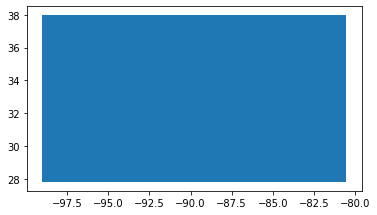

In [9]:
gdf[gdf["years"] == "1978–1989"].plot()

In [10]:
gdf.to_file("data/processed/pam_ranges.geojson", driver="GeoJSON")

/Users/stiles/.local/share/virtualenvs/grid-notebooks-Amv9DX-2/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [11]:
for r in gdf.years.unique():
    gdf[gdf["years"] == r].to_file(
        f"data/processed/pam_ranges_{r}.geojson", driver="GeoJSON"
    )

/Users/stiles/.local/share/virtualenvs/grid-notebooks-Amv9DX-2/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/Users/stiles/.local/share/virtualenvs/grid-notebooks-Amv9DX-2/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/Users/stiles/.local/share/virtualenvs/grid-notebooks-Amv9DX-2/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/Users/stiles/.local/share/virtualenvs/grid-notebooks-Amv9DX-2/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.

---

## Cases by state

#### Read data from CDC

In [12]:
states = pd.read_excel(
    "https://www.cdc.gov/parasites/naegleria/csv/naegleria-cases-for-map.xlsx"
)

In [13]:
states.columns = ["state", "count"]

In [14]:
states[["state", "postal"]] = (
    states["state"]
    .str.replace(")", "", regex=False)
    .str.replace(" (", "|", regex=False)
    .str.split("|", expand=True)
)

In [15]:
states.loc[states["state"] == "Indiana", "postal"] = "IN"

In [16]:
states

,state,count,postal
0,Arizona,8,AZ
1,Arkansas,6,AR
2,California,9,CA
3,Florida,36,FL
4,Georgia,5,GA
5,Indiana,1,IN
6,Kansas,2,KS
7,Louisiana,4,LA
8,Maryland,1,MD
9,Minnesota,2,MN


In [17]:
states.to_csv("data/processed/pam_cases_states.csv", index=False)

---

## Case reports by year

#### Read CDC data

In [18]:
years_src = pd.read_excel(
    "https://www.cdc.gov/parasites/naegleria/csv/naegleria-number-of-case-reports.xlsx",
    header=[1],
)

In [19]:
years = years_src.drop([1, 2, 3], axis=0).T.reset_index()

In [20]:
years.columns = ["year", "count"]

In [21]:
years.drop(0, inplace=True)

In [22]:
years.to_csv("data/processed/pam_cases_years.csv", index=False)